In [44]:
pkg load image;


In [45]:
%ls_magic

Here, we are going to discuss the removal of a particular kind of noise. 

In [30]:
fx = 10;
fy = 5;
noise = fftshift(fft2(ones(256)));
noise(129-fx,129-fy) = noise(129,129)/2; % 10 rows and 5 columns away from center
noise(129+fx,129+fy) = noise(129,129)/2;
noise = real(ifft2(ifftshift(noise)));



The noise in this case, will resemble a sinusoid of low frequency.\
Something like this

ans =   -2.2204e-16


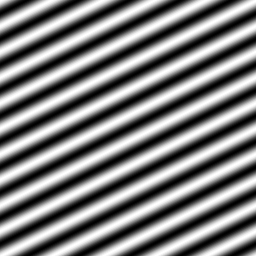

In [19]:
imshow(noise);

Now we apply this noise to an image.


In [13]:
img  = imread('barbara.png');
img  = img(1:256,257:512); % Just extracting a small part of the original image


The image used is

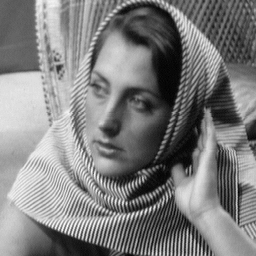

In [14]:
imshow(img)

In [24]:
n_img = img + 32*noise;

After adding noise, our corrupted image looks like

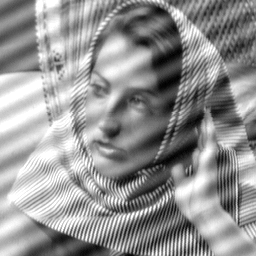

In [25]:
imshow(n_img)

In [26]:
ft = fftshift(fft2(n_img));
lmft = log(abs(ft)+1);


max(lmft(:))
lmft(129,129)

ans =  16.154
ans =  16.154


The Discrete Fourier Transform of the above image is

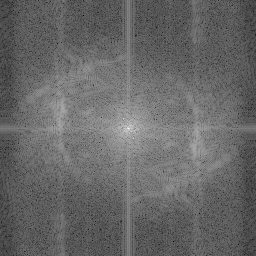

In [41]:
imshow(lmft);
zoom on;

In [ ]:
k=5;
noise_ft = ft;
noise_ft(237,247)=ft(257,257)/2;
noise_ft(277,267)=ft(257,257)/2;

imshow(log(abs(noise_ft+1)));

In [ ]:
n_img= real(ifft2(ifftshift(noise_ft)));

imshow(n_img);


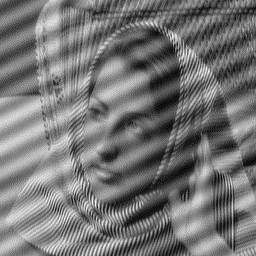

In [17]:
load('image_low_frequency_noise.mat');
imshow(Z)

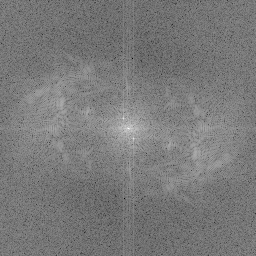

In [20]:
ft = fftshift(fft2(Z));
lmft = log(abs(ft)+1);

imshow(lmft);


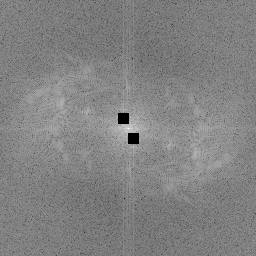

In [21]:
k=5; % size of notch filter = 2k+1
lmft2 = lmft;
lmft2(119-k:119+k,124-k:124+k)=0;
lmft2(139-k:139+k,134-k:134+k)=0;
imshow(lmft2)

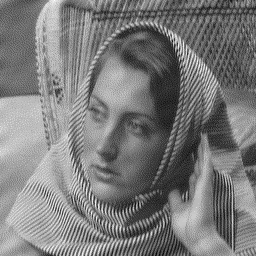

In [22]:
reft = ft;
reft(119-k:119+k,124)=0;
reft(119,124-k:124+k)=0;
reft(139-k:139+k,134)=0;
reft(139,134-k:134+k)=0;
rez= real(ifft2(ifftshift(reft)));

imshow(rez);